In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
predict = model1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
k = confusion_matrix(y_test,predict)
k

array([[159,   5],
       [ 10, 126]])

In [ ]:
ac = accuracy_score(y_test,predict)
ac

0.95

In [ ]:
pred_prob1

array([[4.24163731e-03, 9.95758363e-01],
       [9.89644051e-01, 1.03559491e-02],
       [5.01252208e-05, 9.99949875e-01],
       [8.58698467e-01, 1.41301533e-01],
       [3.72425389e-01, 6.27574611e-01],
       [9.74275380e-01, 2.57246197e-02],
       [9.99677193e-01, 3.22806515e-04],
       [6.70338963e-01, 3.29661037e-01],
       [1.27738231e-01, 8.72261769e-01],
       [3.41530252e-02, 9.65846975e-01],
       [1.21992495e-01, 8.78007505e-01],
       [9.97923279e-01, 2.07672146e-03],
       [4.76731051e-01, 5.23268949e-01],
       [9.94895776e-01, 5.10422436e-03],
       [9.67578587e-01, 3.24214127e-02],
       [9.86871191e-01, 1.31288092e-02],
       [9.48974008e-01, 5.10259918e-02],
       [2.89861407e-03, 9.97101386e-01],
       [9.99727345e-01, 2.72654631e-04],
       [9.52366420e-01, 4.76335797e-02],
       [9.83778801e-01, 1.62211990e-02],
       [9.90141893e-01, 9.85810714e-03],
       [9.84360706e-01, 1.56392940e-02],
       [1.50042831e-02, 9.84995717e-01],
       [9.665768

In [ ]:
pred_prob2

array([[0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.25, 0.75],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.  ,

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


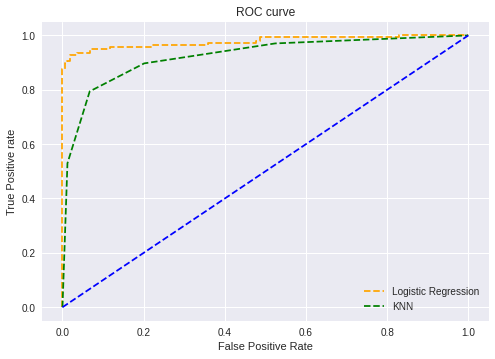

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();